In [1]:
import random 
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.cluster import KMeans
import pprint

In [2]:
class wsn:
    def __init__(self,**kwargs):
        
        self.actions = [0,1,2] # 0=Sleep,1=Transmit,2=Dead
        self.n_actions = len(self.actions)
        self.reward = 10
        self.noreward = 0
        self.NodesLists = self.cn(20)

    def step(self,action):
        
        if action == 0:
            
                for i in range(len(self.NodesLists)):
                    
                    if(self.NodesLists[i]['isDead'] == False and self.NodesLists[i]['wantToSendData'] == False):
                            self.NodesLists[i]['energy'] -= self.idleEnergy(10000)
                            done = False
                    
                    elif(self.NodesLists[i]['isDead'] == True):
                        done = True
                        return(0,-10,done)
                    
                    else :
                        done = False 
                        return(1,10,done)
                    
                    
                return(0,0,done)
        
        elif action == 1:
            done = True
            return(2, 10, done)
        
        else :
            done = False
            return(0, -10, done)
    
    def cn(self,x):
        
        factor=5
        X=[]
        Y=[]

        random.seed(10)

        number_of_points = x
        
        for i in range(number_of_points):
                X.append(-50*factor+100*factor*random.random())
                Y.append(-50*factor+100*factor*random.random())
        
        NodesList=[]

        for i in range(len(X)):
    
            Node = {'id':0,'energy': 0,'location':{'x':0,'y': 0,},'isClusterHead': False,'isDead':False,'isBaseNode':False,'threshold':0.1,'lastTimeCH':-1,'wantToSendData':False}
            Node['id'] = i+1
            Node['energy'] = 5   # Energy of Each node is 5 Joules
            Node['location']['x'] = X[i]
            Node['location']['y'] = Y[i]
            Node['isClusterHead']=False
            Node['isBaseNode'] = False
    
            NodesList.append(Node)
        return(NodesList)
    
# Function to calculate energy by nodes to transmit a packet between two nodes 
    def transmissionEnergy(self,k,d):
        return 50*pow(10,-6)*k+10*pow(10,-9)*(d**2)*k 

# Function to calculate energy consummed by node while receiving any packet
    def receivingEnergy(self,k):
        return 50*pow(10,-6)*k 

# Function to calculate idle energy
    def idleEnergy(self,k):
        return 40*pow(10,-6)*k 
        
    def reset(self):
        return 0
    
    def render(self): 
        pass
   
    def print_value_all(self,q_table):
        
        for i in range(3):
            for j in range(3):
                print(q_table[i][j], end = " ")
            print()
            

In [3]:
class QLearningAgent:
    
    def __init__(self, actions):
        
        self.actions = actions
        self.learning_rate = 0.05
        self.discount_factor = 0.9
        self.epsilon = 0.1

        self.q_table = {0:[0.0,0.0,0.0],
                        1:[0.0,0.0,0.0],
                        2:[0.0,0.0,0.0]}
        
    
    def learn(self, state, action, reward, next_state):
        
        current_q = self.q_table[state][action]
        
        new_q = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (new_q - current_q)

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            
            action = np.random.choice(self.actions)
        else:
          
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
        return action

    def arg_max(self,state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

if __name__ == "__main__":
    
    env = wsn()
    agent = QLearningAgent(actions=list(range(env.n_actions)))

    for episode in range(25):
        state = env.reset()

        while True:
            env.render()

            action = agent.get_action(state)
            print(action)
            next_state, reward, done = env.step(action)


            agent.learn(state, action, reward, next_state)

            state = next_state
            
            env.print_value_all(agent.q_table)

            if done == False :
                break    
                
    print("*********x************")
    print("The Node List is")
    print("*********x************")
    
    pprint.pprint(env.NodesLists)

1
0.0 0.5 0.0 
0.0 0.0 0.0 
0.0 0.0 0.0 
0
0.0 0.5 0.0 
0.0 0.0 0.0 
0.022500000000000003 0.0 0.0 
2
0.0 0.5 -0.47750000000000004 
0.0 0.0 0.0 
0.022500000000000003 0.0 0.0 
1
0.0 0.9760125000000001 -0.47750000000000004 
0.0 0.0 0.0 
0.022500000000000003 0.0 0.0 
0
0.0 0.9760125000000001 -0.47750000000000004 
0.0 0.0 0.0 
0.06529556250000002 0.0 0.0 
1
0.0 1.4301501753125 -0.47750000000000004 
0.0 0.0 0.0 
0.06529556250000002 0.0 0.0 
2
0.0 1.4301501753125 -0.47750000000000004 
0.0 0.0 0.0 
0.06529556250000002 0.0 -0.4356432421109375 
1
0.0 1.8615809668593752 -0.47750000000000004 
0.0 0.0 0.0 
0.06529556250000002 0.0 -0.4356432421109375 
0
0.0 1.8615809668593752 -0.47750000000000004 
0.0 0.0 0.0 
0.1458019278836719 0.0 -0.4356432421109375 
1
0.0 2.275063005271172 -0.47750000000000004 
0.0 0.0 0.0 
0.1458019278836719 0.0 -0.4356432421109375 
0
0.0 2.275063005271172 -0.47750000000000004 
0.0 0.0 0.0 
0.24088966672669104 0.0 -0.4356432421109375 
1
0.0 2.6721498900103144 -0.477500000000000

In [4]:
def euclid_dist(a1,
                a2,b1,b2):
    return (math.sqrt((a1-a2)**2+(b1-b2)**2))

In [5]:
def calculateClusterHead(NodesList,roundNum):
    
    P=0.08  
    x=(P*(roundNum%round(1/P)))
    if(roundNum%(1/P)==0):
        for i in range(1,len(NodesList)):
            NodesList[i]['lastTimeCH'] = -1
    T=(P/(1-x))
    print(T,x)
    
    count_=0
    flag = True
    cnt = 0

    for i in range(1,len(NodesList)):
        if( (NodesList[i]['lastTimeCH']==-1 and NodesList[i]['isDead']==False and NodesList[i]['isBaseNode']==True) or (NodesList[i]['lastTimeCH']!=-1 and roundNum>=NodesList[i]['lastTimeCH']+(1/P) and NodesList[i]['energy']>=NodesList[i]['threshold'] and NodesList[i]['isDead']==False and NodesList[i]['isBaseNode']==True) ):
            random_num=random.random()
            cnt+=1
            if(random_num<=T):
                flag = False
                count_+=1
                NodesList[i]['isClusterHead']=True
                NodesList[i]['lastTimeCH']=roundNum
    print("Total number of candidate for selection:",cnt)
    
    while(flag==True and cnt!=0):
        
        for i in range(1,len(NodesList)):
            if( (NodesList[i]['lastTimeCH']==-1 and NodesList[i]['isDead']==False and NodesList[i]['isBaseNode']==True) or (NodesList[i]['lastTimeCH']!=-1 and roundNum>=NodesList[i]['lastTimeCH']+(1/P) and NodesList[i]['energy']>=NodesList[i]['threshold'] and NodesList[i]['isBaseNode']==True) ):
                random_num=random.random()
                if(random_num<=T):
                    flag = False
                    count_+=1
                    NodesList[i]['isClusterHead']=True
                    NodesList[i]['lastTimeCH']=roundNum
    NodesList[0]=count_
    return NodesList

In [6]:
factor=5
X=[]
Y=[]

random.seed(10)

number_of_points = 20
for i in range(number_of_points):
    X.append(-50*factor+100*factor*random.random())
    Y.append(-50*factor+100*factor*random.random())
    
base_stnX = 0
base_stnY = -300

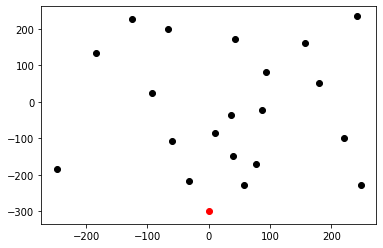

In [7]:
plt.scatter(X, Y,c='black')
plt.scatter(base_stnX,base_stnY,c='red')

In [8]:
NodesList=[]
NodesList.append([])

for i in range(len(X)):
    
    Node = {'id':0,'energy': 0,'location':{'x':0,'y': 0,},'isClusterHead': False,'isBaseNode':False,'isDead':False,'threshold':0.1,'lastTimeCH':-1,'wantToSendData':False}
    Node['id'] = i+1
    Node['energy'] = 5000    # Energy of Each node is 5 miliJoules
    Node['location']['x'] = X[i]
    Node['location']['y'] = Y[i]
    Node['isClusterHead']=False
    Node['isBaseNode']=False
    
    NodesList.append(Node)

In [9]:
#K Means

df=[]
for i in range(len(NodesList)-1):
    df.append([X[i],Y[i]])

kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

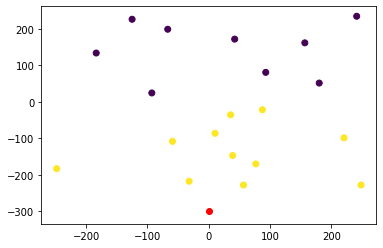

In [10]:
plt.scatter(X, Y,c=kmeans.labels_)
plt.scatter(base_stnX,base_stnY,c='red')

In [11]:
c1 = []  #black
c2 = []  #yellow

X1 = []  #black
X2 = []  #yellow

for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        c1.append(i+1)
        X1.append(df[i])
        
    else :
        c2.append(i+1)
        X2.append(df[i])

In [12]:
for i in range(1,len(NodesList)):
    
    if NodesList[i]['id'] in c2:
        #print(NodesList[i]['id'])
        NodesList[i]['isBaseNode'] = True

0.08 0.0
Total number of candidate for selection: 11
0.08695652173913043 0.08
Total number of candidate for selection: 10
0.09523809523809525 0.16
Total number of candidate for selection: 8
0.10526315789473684 0.24
Total number of candidate for selection: 7
0.11764705882352942 0.32
Total number of candidate for selection: 5
0.13333333333333333 0.4
Total number of candidate for selection: 2
0.15384615384615385 0.48
Total number of candidate for selection: 1
0.18181818181818185 0.56
Total number of candidate for selection: 0
0.22222222222222224 0.64
Total number of candidate for selection: 0
0.2857142857142857 0.72
Total number of candidate for selection: 0
0.4000000000000001 0.8
Total number of candidate for selection: 0
0.6666666666666667 0.88
Total number of candidate for selection: 0
0.08 0.0
Total number of candidate for selection: 0
0.08695652173913043 0.08
Total number of candidate for selection: 1
0.09523809523809525 0.16
Total number of candidate for selection: 2
0.1052631578947

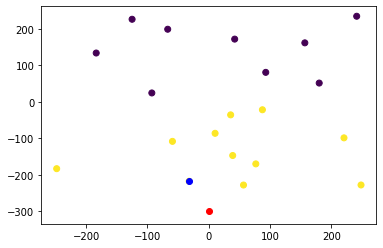

In [13]:
numberOfDeadNodesAxis=[]

maxRound = 50

for i in range(maxRound):
    NodesList = calculateClusterHead(NodesList,i)
    for j in range(1,len(NodesList)):
        if(NodesList[j]['isClusterHead']==True):
            (x,y)=(NodesList[j]['location']['x'],NodesList[j]['location']['y'])

plt.scatter(X, Y,c=kmeans.labels_)
plt.scatter(base_stnX,base_stnY,c='red')
plt.scatter(x,y,c='blue')
plt.show()         